# Build a Large Language Model From Scratch
https://livebook.manning.com/book/build-a-large-language-model-from-scratch/chapter-2/26

## 2 Working with text data

Reading in a short story as text sample into Python

In [1]:
import urllib.request

url = ("https://raw.githubusercontent.com/rasbt/"
       "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
       "the-verdict.txt")

file_path = "the-verdict.txt"
urllib.request.urlretrieve(url, file_path)

('the-verdict.txt', <http.client.HTTPMessage at 0x7aa0c0114d40>)

In [2]:
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()

print(f"Total number of characters: {len(raw_text)}")
print(raw_text[:99])

Total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


Splitting text into list of individual words, whitespaces and punctuation.

In [3]:
import re

text = "Hello, world. This, is a test."

result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
result = [item for item in result if item.strip()]
result

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']

In [6]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)

result = [item.strip() for item in result if item.strip()]

print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [7]:
def basic_tokenizer(text):
    result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    result = [item.strip() for item in result if item.strip()]
    return result

In [8]:
preprocessed = basic_tokenizer(raw_text)
print(len(preprocessed))
print(preprocessed[:30])

4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [9]:
all_words = set(preprocessed)
vocab_size = len(all_words)
print(vocab_size)

1130


Creating a vocabulary

In [ ]:
vocab = {token: integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('note', 0)
('And', 1)
('elbow', 2)
('growing', 3)
('Or', 4)
('silent', 5)
('subject', 6)
('it', 7)
('deerhound', 8)
('sensation', 9)
('oddly', 10)
('felt', 11)
('canvas', 12)
('hot-house', 13)
('pale', 14)
('be', 15)
('dim', 16)
('lovely', 17)
('amid', 18)
('happen', 19)
('drawing-rooms', 20)
('mirrors', 21)
('haven', 22)
('loss', 23)
('could', 24)
('house', 25)
('them', 26)
('extenuation', 27)
('dissatisfied', 28)
('understand', 29)
('underneath', 30)
('It', 31)
('sitters', 32)
('suggested', 33)
('characteristic', 34)
('presenting', 35)
('beneath', 36)
('crowned', 37)
('event', 38)
('better', 39)
('looking', 40)
('oak', 41)
('amazement', 42)
('quote', 43)
('twenty', 44)
('Carlo', 45)
('villa', 46)
('hesitations', 47)
('balancing', 48)
('liked', 49)
('square', 50)


Implementing a simple text tokenizer

In [ ]:
class SimpleTokenizerV1:

    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([.,?_!"()\']|--|\s)', text)

        preprocessed = [item for item in preprocessed if item.strip()]

        ids = [self.str_to_int[s] for s in preprocessed]

        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)

        return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[708, 31, 257, 873, 854, 724, 1108, 603, 1092, 682, 773, 1092, 708, 118, 181, 226, 912, 772, 582, 590, 181]


In [ ]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [ ]:
# text = "Hello, do you like tea?"
# tokenizer.encode(text)

Extending the vocabulary to include special tokens `<|unk|>` and `<|endoftext|>`

In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|unk|>", "<|endoftext|>"])
vocab = {token: integer for integer, token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|unk|>', 1130)
('<|endoftext|>', 1131)


A simple tokenizer that handles unknown words

In [ ]:
class SimpleTokenizerV2:

    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([.,?_!"()\']|--|\s)', text)


        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        preprocessed = [item if item in self.str_to_int
                        else "<|unk|>" for item in preprocessed]

        ids = [self.str_to_int[s] for s in preprocessed]

        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)

        return text

In [ ]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer = SimpleTokenizerV2(vocab)
tokenizer.encode(text)


[1130, 5, 355, 1126, 628, 975, 10, 1131, 55, 988, 956, 984, 722, 988, 1130, 7]

Sanity check

In [ ]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


### Byte pair encoding

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
from tiktoken._educational import *

# training a bpe tokenizer on a small amount of text
enc = train_simple_encoding()


Streaming output truncated to the last 5000 lines.
The current most common pair is b' ' + b'en'
So we made b' en' our 324th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'u' + b'al'
So we made b'ual' our 325th token
Now the first fifty words in our training data look like:
"""This is an educational implementation of the byte pair encoding algorithm."""

from __future__ import annotations

import collections

import regex

import tiktoken


class SimpleBytePairEncoding:
    def __init__(self, *, pat_str:


The current most common pair is b'\n        ' + b'    '
So we made b'\n            ' our 326th token
Now the first fifty words in our training data look like:
"""This is an educational implementation o

In [ ]:
# visualize how GPT-4 encoder encodes text
enc = SimpleBytePairEncoding.from_tiktoken("cl100k_base")
enc.encode("hello world aaaaaaa i am a taco")

hello
hello
hello
hello
hello

 world
 world
 world
 world
 world
 world

 aaaaaaa
 aaaaaaa
 aaaaaaa
 aaaaaaa
 aaaaaaa
 aaaaaaa

 i
 i

 am
 am
 am

 a
 a

 taco
 taco
 taco
 taco
 taco



[15339, 1917, 264, 29558, 5418, 602, 1097, 264, 91941]

In [ ]:
from importlib.metadata import version
import tiktoken
print(version('tiktoken'))

0.8.0


In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
text = ("Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace.")

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [ ]:
strs = tokenizer.decode(integers)
print(strs)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [ ]:
text = ("Akwirw ier.")

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[33901, 86, 343, 86, 220, 959, 13]


In [ ]:
strs = tokenizer.decode(integers)
print(strs)

Akwirw ier.


![2-12[1].png](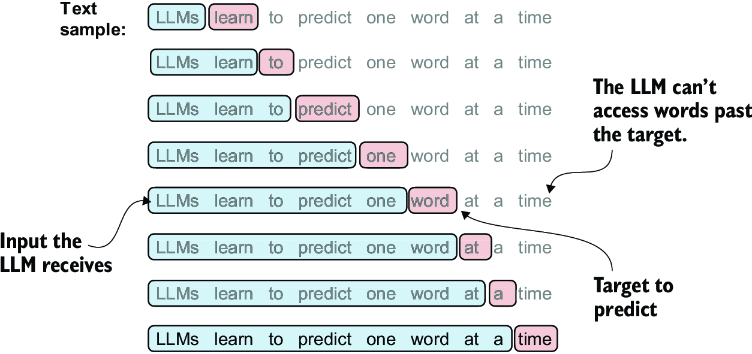)

Implementing a dataloader with a sliding window approach

In [ ]:
with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [ ]:
enc_sample = enc_text[50:]

In [ ]:
context_size = 6
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:     {y}")

x: [290, 4920, 2241, 287, 257, 4489]
y:     [4920, 2241, 287, 257, 4489, 64]


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257
[290, 4920, 2241, 287, 257] ----> 4489
[290, 4920, 2241, 287, 257, 4489] ----> 64


The tokens left of the arrow represent the LLM input and the token ID on the right represents the target token ID that the LLM needs to predict. Now we convert token IDs into text.

In [ ]:
dec_sample = tokenizer.decode(enc_sample)
print(len(dec_sample))

20267


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a
 and established himself in a ---->  vill
 and established himself in a vill ----> a


![2-13[1].png](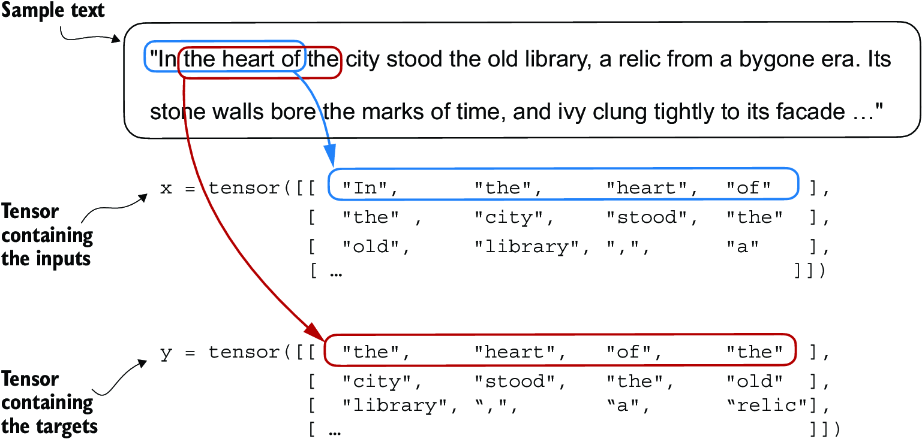)

Using pytorch `Dataset` and `Dataloader` for batched inputs and targets

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, text, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(text)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]

            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, index):
        return self.input_ids[index], self.target_ids[index]

A dataloader to generate batches with input-output pairs

In [ ]:
def create_dataloader_v1(text, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(text, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers)

    return dataloader

Testing dataloader with batch_size=1 for an LLM with context size of 4

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [ ]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


![2-14[1].png](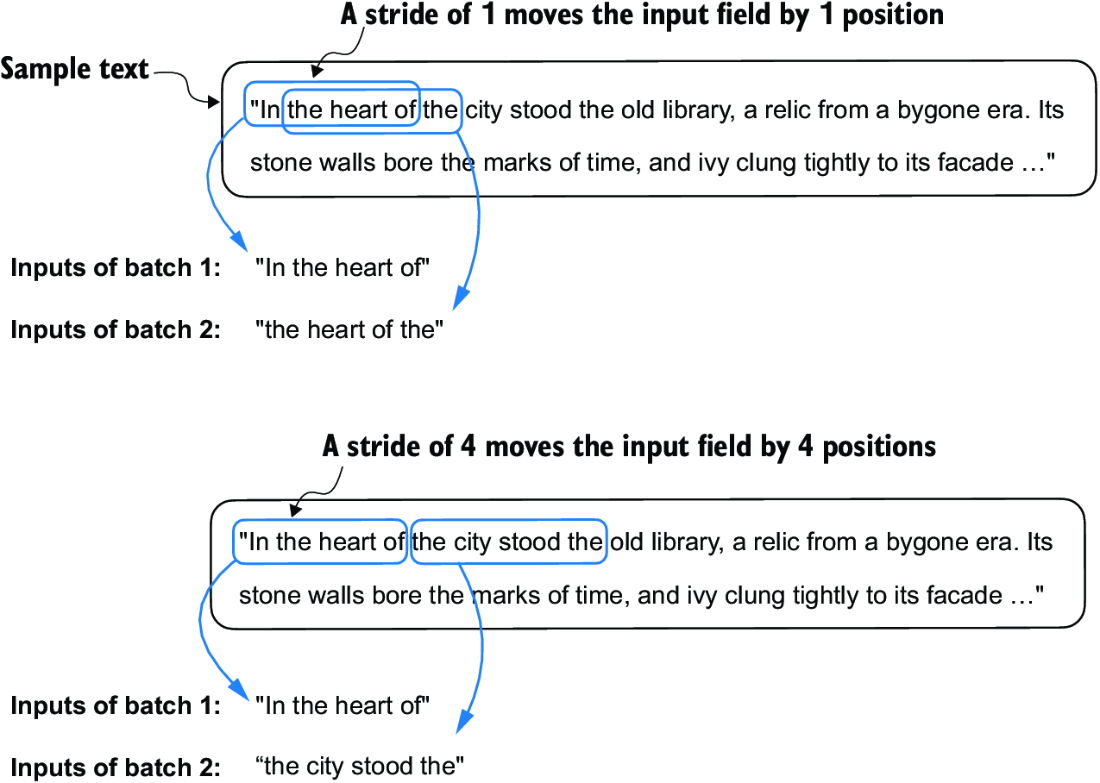)

In [ ]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


Creating token embeddings

![2-15[1].png](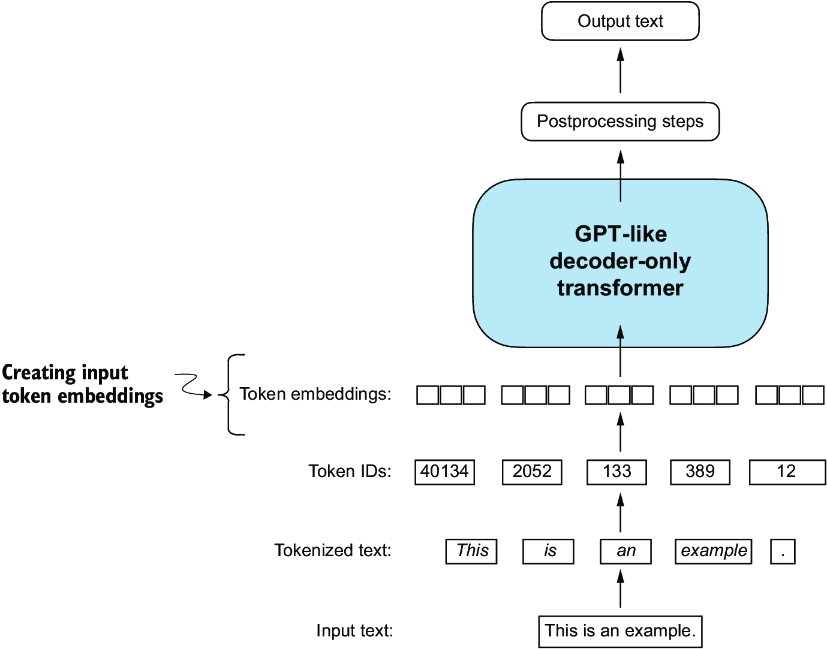)

In [ ]:
input_ids = torch.tensor([2, 3, 5, 1])

Test with vocab of only 6 tokens and vectors with 3 dimensions

In [ ]:
vocab_size = 6
output_dim = 3

In [ ]:
torch.manual_seed(42)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


In [ ]:
print(embedding_layer(torch.tensor([4])))

tensor([[-0.2316,  0.0418, -0.2516]], grad_fn=<EmbeddingBackward0>)


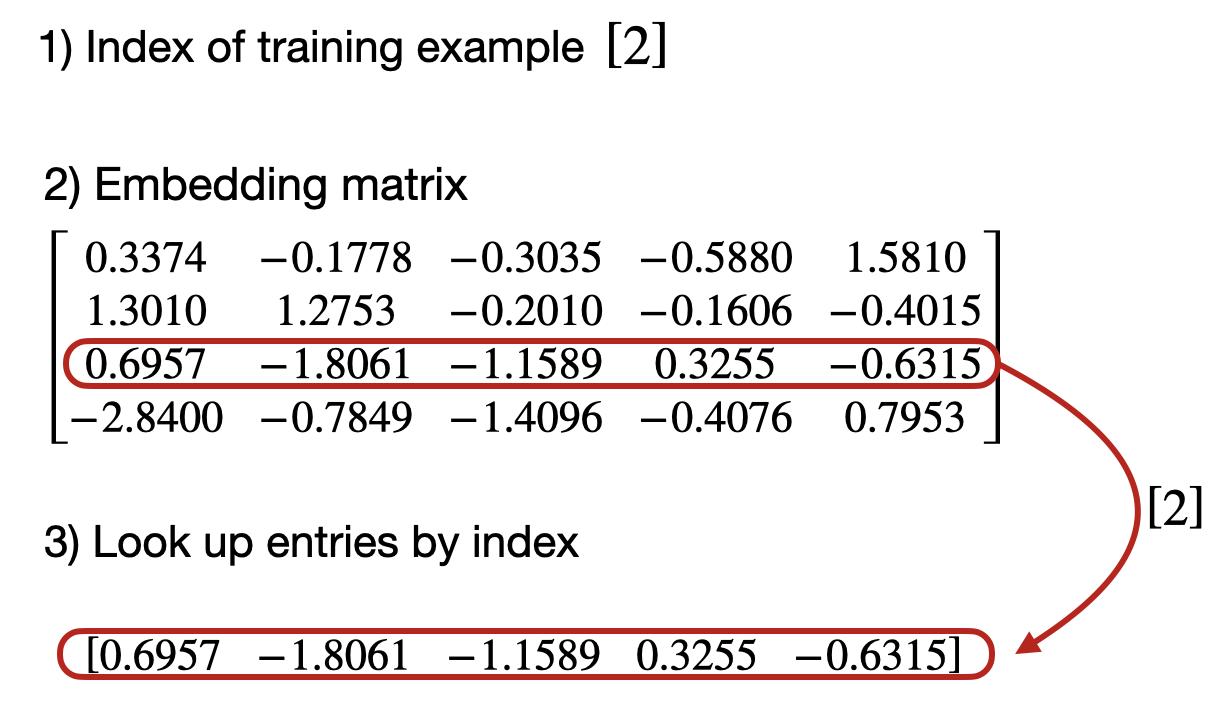

In [ ]:
print(embedding_layer(input_ids))

tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], grad_fn=<EmbeddingBackward0>)


Encoding word positions into our embeddings

In [ ]:
vocab_size = 50_257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
# instantiate the dataloader

max_length = 4

dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length, stride=max_length,
    shuffle=False
)

data_iter = iter(dataloader)

inputs, targets = next(data_iter)

print(f"Token IDs: {inputs}")
print(f"Inputs shape: {inputs.shape}")

Token IDs: tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Inputs shape: torch.Size([8, 4])


In [ ]:
# getting token embeddings from embed layer

token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [ ]:
context_length = max_length

pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
# adding positional embeddings to token embeddings in each of the 8 batches

token_embeddings = token_embeddings + pos_embeddings
print(token_embeddings.shape)

torch.Size([8, 4, 256])


![2-19[1].png](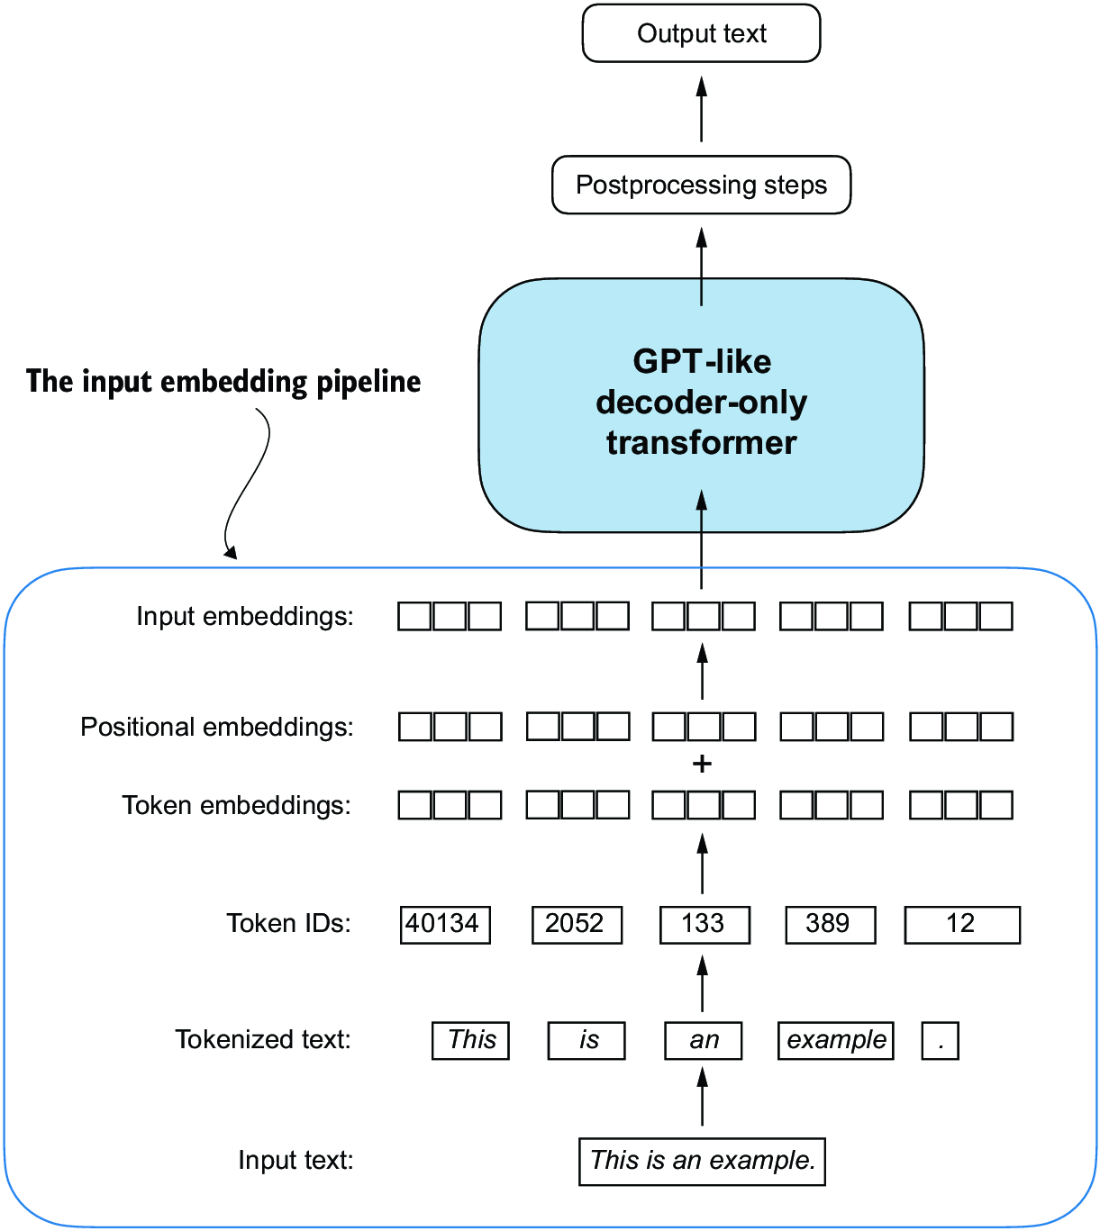)

## 3 Coding attention mechanisms

Goal is to obtain more efficient input representation known as "contextual vectors. Each position in a sequence is allowed to interact with all other positions.

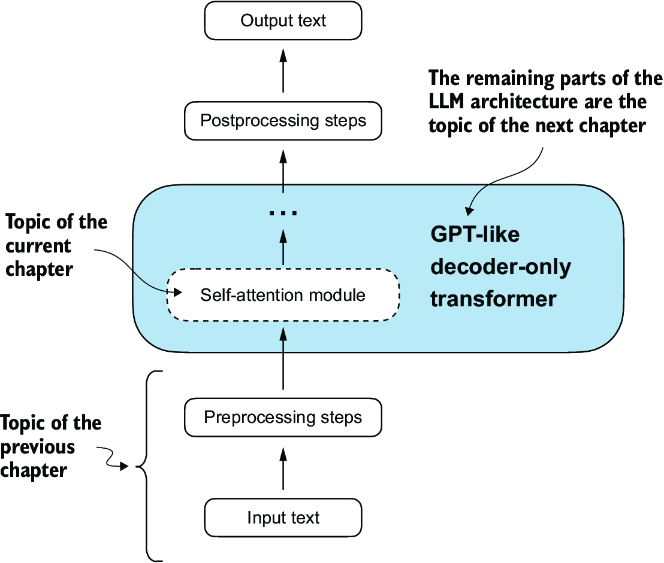

Obtaining the context vector *z*(2) for the input token "journey" using the input vector *x*(2) and all other input vectors

![3-7[1].png](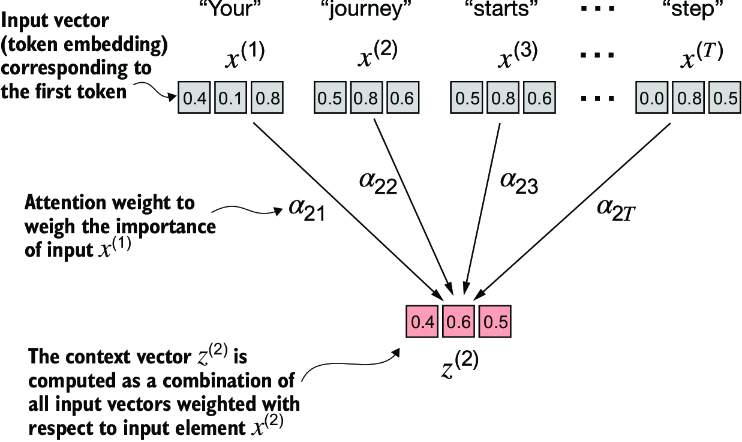)

Implementing a simplified self-attention mechanism to compute to compute attention weights

In [ ]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

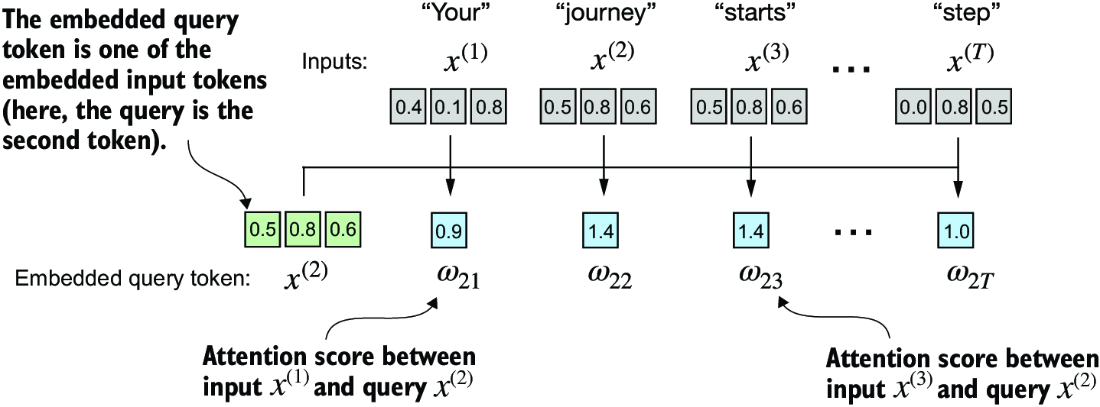

In [ ]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

attn_scores_2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

Normalizing attention scores to sum up to 1 to get attention weights

In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print(f"Attention weights: {attn_weights_2_tmp}")

print(f"Sum of attention weights: {attn_weights_2_tmp.sum()}")

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of attention weights: 1.0000001192092896


*N.B.* In practice it is better to use the `softmax` function for normalizing attention scores.

In [ ]:
def naive_softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = naive_softmax(attn_scores_2)

print(f"Attention weights: {attn_weights_2_naive}")
print(f"Sum of attention weights: {attn_weights_2_naive.sum()}")

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: 1.0


The PyTorch implementation of softmax has been optimized for performance

In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print(f"Attention weights: {attn_weights_2}")
print(f"Sum of attention weights: {attn_weights_2.sum()}")

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: 1.0


*z*(2) is the weighted sum of all vectors obtained by multiplying each by its corresponding attention weight

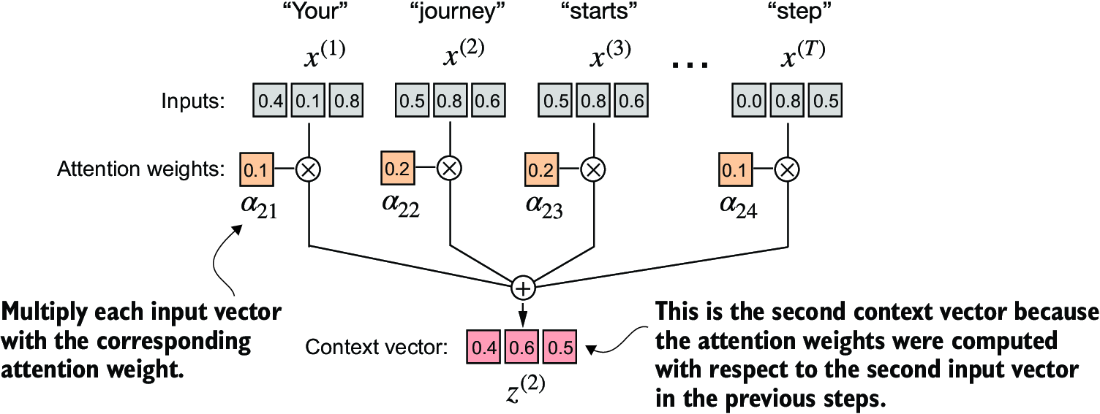

In [ ]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)

for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i

context_vec_2

tensor([0.4419, 0.6515, 0.5683])

### Computing attention weights for all input tokens

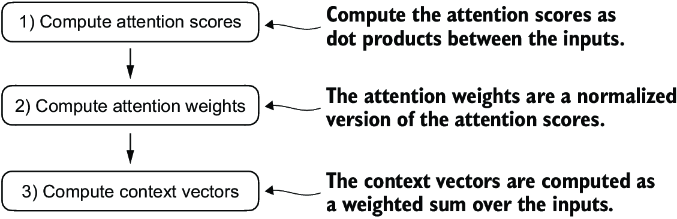

In [ ]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i, x_j)

attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

As `for` loops are generally slow, we can achieve the same results using matrix multiplication.

In [ ]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

Normalizing each row using Softmax

In [ ]:
attn_weights = torch.softmax(attn_scores, dim=-1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [ ]:
row_2_sum = attn_weights[1].sum().item()

row_2_sum

1.0

In [ ]:
print(f"All row sums: {attn_weights.sum(dim=-1)}")

All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


Third and final step: compute all context vectors via matrix multiplication

In [ ]:
all_context_vectors = attn_weights @ inputs
all_context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [ ]:
# see if second vector is same as previously calculated one

print(f"Previously 2nd context vector: {context_vec_2}")

Previously 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


### Implementing self-attention with trainable weights

![3-14[1].png](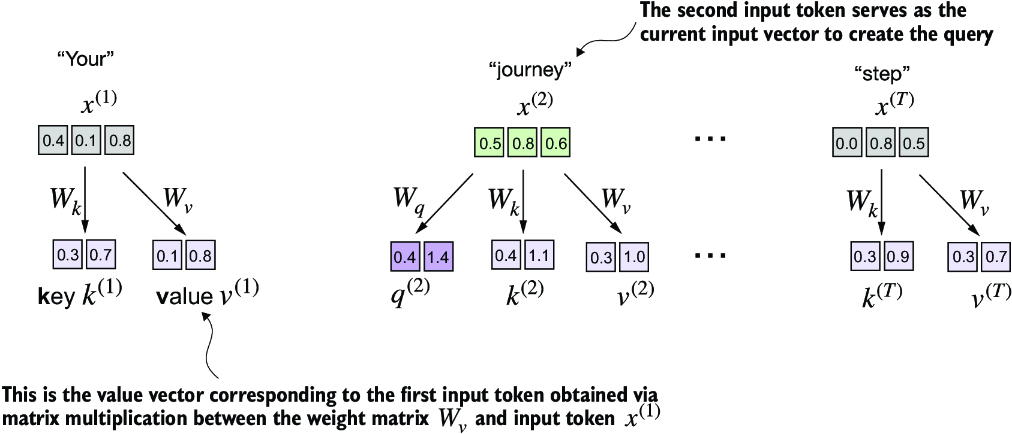)

In [ ]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [ ]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [ ]:
x_2

tensor([0.5500, 0.8700, 0.6600])

In [ ]:
# initialize the weight matrices
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)


In [ ]:
# compute q, k, v vectors
query_2  = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([-1.1729, -0.0048])


In [ ]:
# all keys and values are obtained via matrix multiplication
keys = inputs @ W_key
values = inputs @ W_value
print(f"Keys shape: {keys.shape}")
print(f"Values shape: {values.shape}")

Keys shape: torch.Size([6, 2])
Values shape: torch.Size([6, 2])


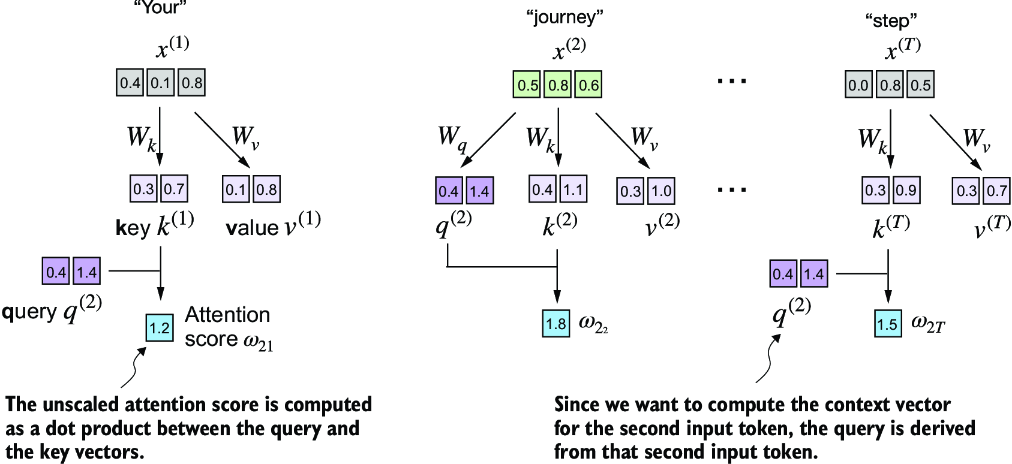

In [ ]:
# computing attention score w22

keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
attn_score_22

tensor(0.1376)

In [ ]:
# generalizing this computation to all attention scores via matmul
attn_scores_2 = query_2 @ keys.T
attn_scores_2

tensor([ 0.2172,  0.1376,  0.1730, -0.0491,  0.7616, -0.3809])

In [ ]:
attn_scores_2 = torch.matmul(query_2, keys.T)
attn_scores_2

tensor([ 0.2172,  0.1376,  0.1730, -0.0491,  0.7616, -0.3809])

Going from attention scores to attention weights: scaling + softmax

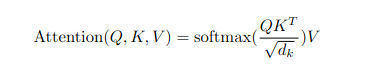

In [ ]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
attn_weights_2

tensor([0.1704, 0.1611, 0.1652, 0.1412, 0.2505, 0.1117])

Final step is to compute the context vectors by multiplying each value vector with its corresponding attn weight and then summing them

In [ ]:
cont_vec_2 = attn_weights_2 @ values
cont_vec_2

tensor([0.2854, 0.4081])

### Compact Python self attention class

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values

        return context_vec

In [ ]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [ ]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [ ]:
# improving self attention implementation with nn.Linear layers

class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)


    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values

        return context_vec

In [ ]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [ ]:
sa_v2.W_query.weight.T

tensor([[ 0.3161, -0.1683],
        [ 0.4568, -0.3379],
        [ 0.5118, -0.0918]], grad_fn=<PermuteBackward0>)

Assigning the weights from an instance of `SelfAttention_v2` to an instance of `SelfAttention_v1`

In [ ]:
sa_v1.W_query = nn.Parameter(sa_v2.W_query.weight.T)
sa_v1.W_key = nn.Parameter(sa_v2.W_key.weight.T)
sa_v1.W_value = nn.Parameter(sa_v2.W_value.weight.T)

![3-20[1].png](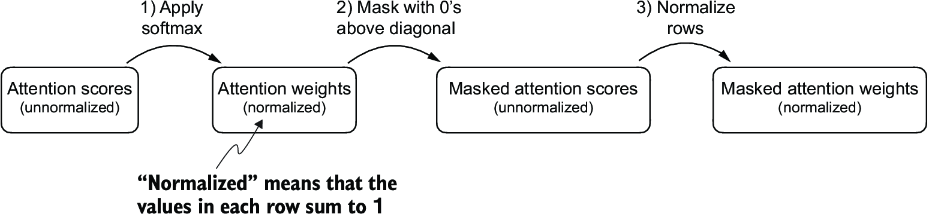)

In [ ]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)

attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)


attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

Using `tril` to get mask all values above the diagonal

In [ ]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_simple = attn_weights * mask_simple
masked_simple

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

Renormalizing the attention weights so that they all sum up to 1

In [ ]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

A more efficient way to obtain masked attention weight matrix by masking attn scores with negative infinity values before applying the softmax function

![3-21[1].png](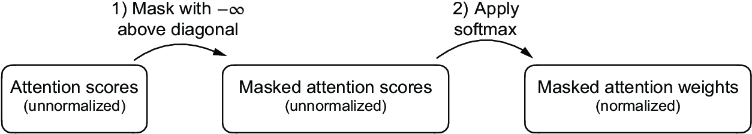)

In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
masked

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)

Applying softmax function to masked results

In [ ]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

### Masking additional attention weights with dropout

In [ ]:
torch.manual_seed(123)

dropout = torch.nn.Dropout(0.5)

example = torch.ones(6, 6)

dropout(example)

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])

To maintain overall balance of attention weights, the remaining elements are scaled up by a factor of 1/0.5 = 2

In [ ]:
# applying dropout to attention weight matrix itself
torch.manual_seed(123)
dropout(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

### Implementing a compact causal attention class

In [ ]:
# stimulating future batch inputs
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [ ]:
# a compact causal attention class
class CausalAttention(nn.Module):


    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):

        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):

        b, num_tokens, d_in = x.shape

        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2)

        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
        )

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        attn_weights = self.dropout(attn_weights)

        context_vec = attn_weights @ values

        return context_vec

In [ ]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [ ]:
torch.manual_seed(123)

context_length = batch.shape[1]

ca = CausalAttention(d_in, d_out, context_length, 0.0)

context_vecs = ca(batch)

print(f"context_vecs.shape: {context_vecs.shape}")

context_vecs.shape: torch.Size([2, 6, 2])


### Stacking multiple single-head attention layers

![3-24[1].png](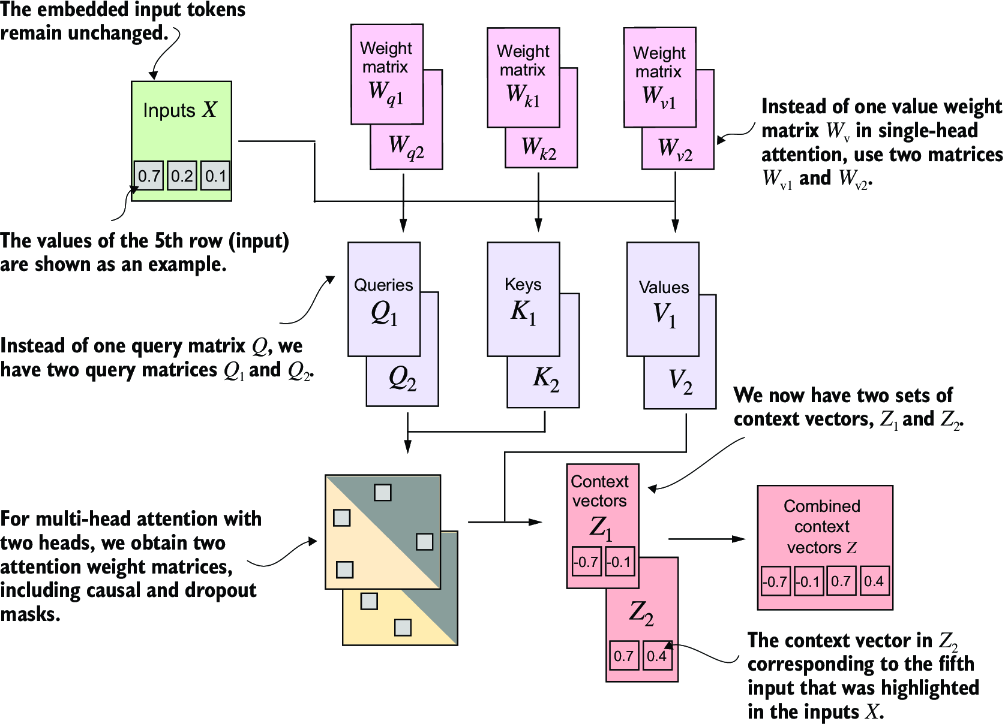)

In [ ]:
# wrapper class to implement multi-head attention

class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
                 dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(
                d_in, d_out, context_length, dropout, qkv_bias
            )
            for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [ ]:
%%time

torch.manual_seed(123)

context_length = batch.shape[1]
d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(f"context_vecs.shape: {context_vecs.shape}")

context_vecs.shape: torch.Size([2, 6, 4])
CPU times: user 6.89 ms, sys: 0 ns, total: 6.89 ms
Wall time: 8.11 ms


Change the input arguments for the `MultiHeadAttentionWrapper(..., num_ heads=2)` call such that the output context vectors are two-dimensional instead of four dimensional while keeping the setting `num_heads=2`.

In [ ]:
%%time

d_in, d_out = 3, 1 # change d_out to 1

mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(f"context_vecs.shape: {context_vecs.shape}")

context_vecs.shape: torch.Size([2, 6, 2])
CPU times: user 4.63 ms, sys: 0 ns, total: 4.63 ms
Wall time: 4.46 ms


### Implementing multi-head attention with weight splits

We will implement a unified `MultiHeadAttention` class that splits input into multiple heads by reshaping projected q, k, v value tensors and then combines the results after computing attention.

In [ ]:
# an efficient multi-head attention class
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out,
                 context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x) # shape [b, num_tokens, d_out]
        queries = self.W_query(x) # shape [b, num_tokens, d_out]
        values = self.W_value(x) # shape [b, num_tokens, d_out]

        # split matrix by adding num_heads dimension
        # then unroll last dim
        # [b, num_tokens, d_out] -> [b, num_tokens, num_heads, head_dim]
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # compute dot product for each head
        attn_scores = queries @ keys.transpose(2, 3)

        # truncate masks to nb of tokens
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill(mask_bool, -torch.inf)

        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1)

        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2) # shape (b, num_tokens, num_heads, head_dim)

        context_vec = context_vec.contiguous().view(
            b, num_tokens, self.d_out
        )

        context_vec = self.out_proj(context_vec)

        return context_vec


Use of `MultiHeadAttention` class similar to `SelfAttention` and `CausalAttention`

In [ ]:
%%time


torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2

mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print(f"context_vecs.shape: {context_vecs.shape}")

tensor([[[0.2595, 0.4014],
         [0.2583, 0.4014],
         [0.2583, 0.4014],
         [0.2575, 0.4031],
         [0.2582, 0.4026],
         [0.2575, 0.4028]],

        [[0.2595, 0.4014],
         [0.2583, 0.4014],
         [0.2583, 0.4014],
         [0.2575, 0.4031],
         [0.2582, 0.4026],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])
CPU times: user 6.73 ms, sys: 957 µs, total: 7.69 ms
Wall time: 7.72 ms


#### Exercice 3.3

Using the `MultiHeadAttention` class, initialize a multi-head attention module that has the same number of attention heads as the smallest GPT-2 model (12 attention heads). Also ensure that you use the respective input and output embedding sizes similar to GPT-2 (768 dimensions). Note that the smallest GPT-2 model supports a context length of 1,024 tokens.

In [ ]:
d_in, d_out = 768, 768
context_length = 1_024
num_heads = 12


gpt2_mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads)

## 4 Implementing a GPT model from scratch to generate text

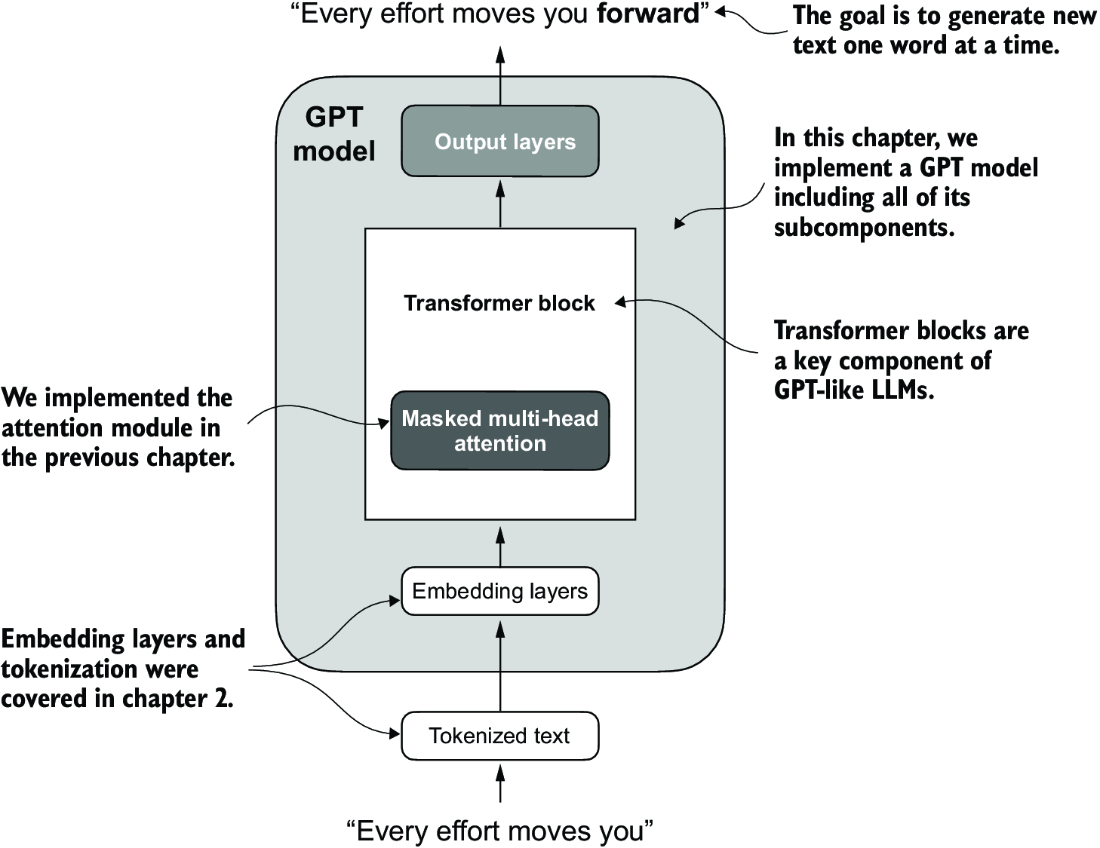

Specifying the config of the small GPT-2 model via the following python dictionary

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50_257,     # Vocabulary size
    "context_length": 1_024,  # Context length
    "emb_dim": 768,          # Embedding dimension
    "n_heads": 12,           # Number of attention heads
    "n_layers": 12,          # Number of layers
    "drop_rate": 0.1,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value bias
}

Order that will be followed to build the GPT architecture from the ground up.

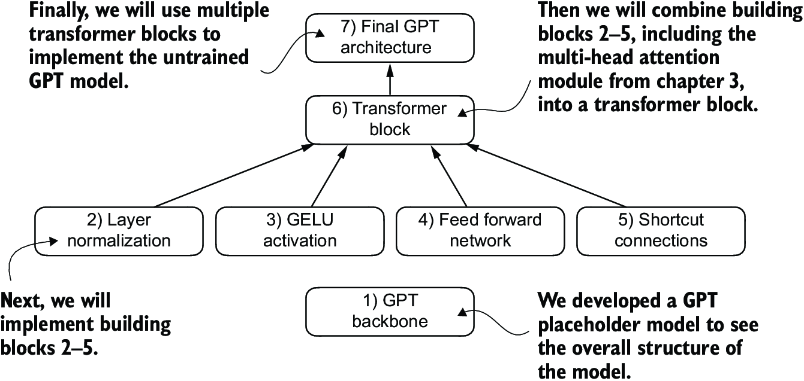

In [ ]:
# placeholder GPT model class

import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):

        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg)
            for _ in range(cfg["n_layers"])]
        )
        self.final_form = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):

        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)

        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )

        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_form(x)

        logits = self.out_head(x)

        return logits

class DummyTransformerBlock(nn.Module): # TODO
    def __init__(self, cfg):
        super().__init__()


    def forward(self, x):
        return x


class DummyLayerNorm(nn.Module): # TODO

    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()


    def forward(self, x):
        return x

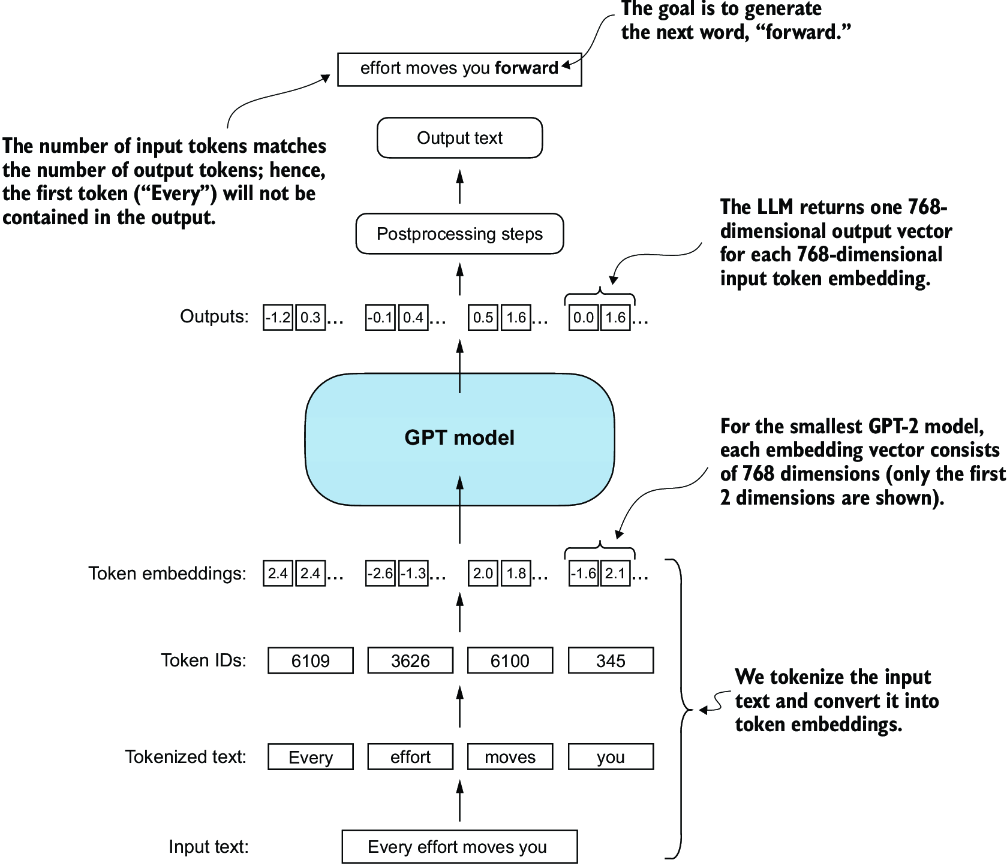

In [ ]:
%%capture
!pip install tiktoken

In [ ]:
# getting input token ids for GPT2

import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


Initializing a 124M `DummyGPTModel` instance and feeding it the tokenized batch

In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print(f"Output shape: {logits.shape}")
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


### Normalizing activations with layer normalization

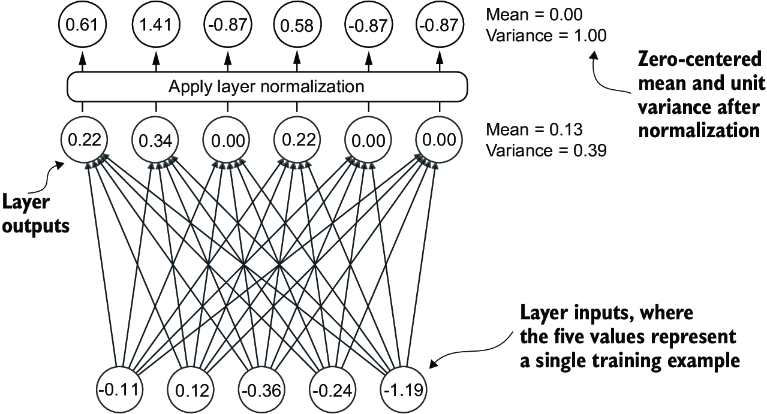

In [ ]:
# recreating above example with batch of two inputs

torch.manual_seed(123)

batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [ ]:
# examining mean and variance of output tensors

mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print(f"Mean:\n {mean}")
print(f"Variance:\n {var}")

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [ ]:
# applying layer normalization to obtained outputs

out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)

print(f"Normalized layer outputs:\n {out_norm}")
print(f"Mean:\n {mean}")
print(f"Variance:\n {var}")

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


Encapsulating layer norm in a module to be used in the GPT model later

In [ ]:
class LayerNorm(nn.Module):

    def __init__(self, emb_dim):
        super().__init__()

        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        x_norm = (x - mean) / torch.sqrt(var + self.eps)

        return self.scale * x_norm + self.shift

Applying `LayerNorm` in practice

In [ ]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)

mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, keepdim=True, unbiased=False)
print(f"Mean:\n {mean}")
print(f"Variance:\n {var}")

Mean:
 tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


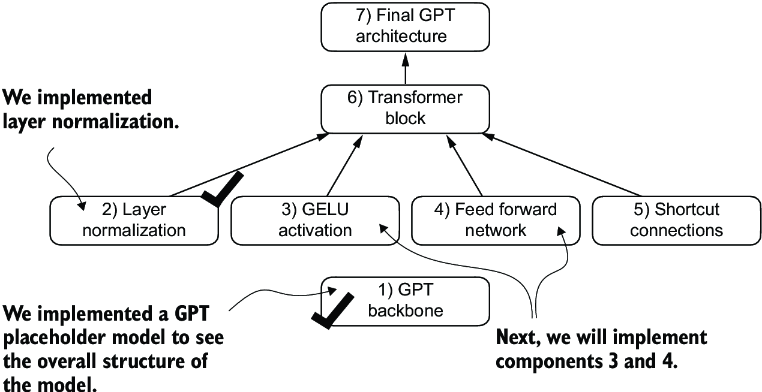

### Implementing a feed forward network with GELU activations

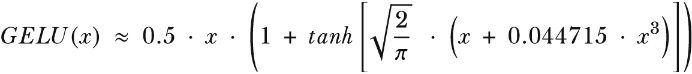

In [ ]:
# GELU activation function implementation

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

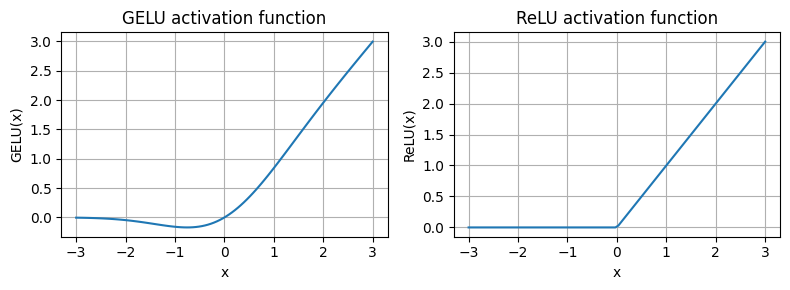

In [ ]:
# comparing GELU and ReLU functions side by side

import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))

for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# A feed forward neural net module
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape) # shape [2, 3, 768]

torch.Size([2, 3, 768])
